In [157]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras import Sequential
from keras.layers import Input, Dense
from keras.activations import relu, softmax
from keras.callbacks import *
from keras.models import load_model

In [158]:
# Importing the dataset
sonar = pd.read_csv(r"C:\Users\91949\Desktop\mines-vs-rocks deep_learning assignment\sonar.all-data.csv")
sonar.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F52,F53,F54,F55,F56,F57,F58,F59,F60,TARGET
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [159]:
# Checking the null values
sonar.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
         ..
F57       0
F58       0
F59       0
F60       0
TARGET    0
Length: 61, dtype: int64

In [160]:
total_features = [feature for feature in sonar.columns]

In [161]:
categorical_features=[feature for feature in total_features if sonar[feature].dtype=='O']

In [162]:
numerical_features=[feature for feature in total_features if sonar[feature].dtype!='O']

In [163]:
# Formats string to number values
LE = LabelEncoder()
sonar['TARGET']=pd.Series(LE.fit_transform(sonar['TARGET']))

In [164]:
sonar['TARGET']

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: TARGET, Length: 208, dtype: int32

In [165]:

sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      208 non-null    float64
 1   F2      208 non-null    float64
 2   F3      208 non-null    float64
 3   F4      208 non-null    float64
 4   F5      208 non-null    float64
 5   F6      208 non-null    float64
 6   F7      208 non-null    float64
 7   F8      208 non-null    float64
 8   F9      208 non-null    float64
 9   F10     208 non-null    float64
 10  F11     208 non-null    float64
 11  F12     208 non-null    float64
 12  F13     208 non-null    float64
 13  F14     208 non-null    float64
 14  F15     208 non-null    float64
 15  F16     208 non-null    float64
 16  F17     208 non-null    float64
 17  F18     208 non-null    float64
 18  F19     208 non-null    float64
 19  F20     208 non-null    float64
 20  F21     208 non-null    float64
 21  F22     208 non-null    float64
 22  F2

In [166]:
# splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(sonar.drop('TARGET', axis=1), sonar['TARGET'], test_size=0.2, 
random_state=12, stratify=sonar['TARGET'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=12, stratify=y_train)
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of validation set: {X_val.shape}")
print(f"Shape of testing set: {X_test.shape}")

Shape of training set: (149, 60)
Shape of validation set: (17, 60)
Shape of testing set: (42, 60)


In [167]:
X_train.shape[1:]

(60,)

In [168]:
#model skeleton
model = Sequential([
    Dense(60), 
    Dense(50, activation=relu), 
    Dense(30, activation=relu),
    Dense(30, activation=relu),
    Dense(2, activation=softmax)
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [169]:
#Define callbacks so that the training can be interrupted when the model shows best performance on the validation set and saves the best model
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)
save_checkpoint = ModelCheckpoint('MVR Ann Model.h5', save_best_only=True)

In [170]:
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=500, validation_data=(X_val.to_numpy(), y_val.to_numpy()), callbacks=[save_checkpoint, early_stopping_callback])

Train on 149 samples, validate on 17 samples
Epoch 1/500
149/149 [==============================] - 1s 6ms/step - loss: 0.7176 - accuracy: 0.4631 - val_loss: 0.7181 - val_accuracy: 0.4706
Epoch 2/500
149/149 [==============================] - 0s 242us/step - loss: 0.7033 - accuracy: 0.4631 - val_loss: 0.7078 - val_accuracy: 0.4706
Epoch 3/500
149/149 [==============================] - 0s 235us/step - loss: 0.6945 - accuracy: 0.4564 - val_loss: 0.6997 - val_accuracy: 0.3529
Epoch 4/500
149/149 [==============================] - 0s 235us/step - loss: 0.6884 - accuracy: 0.5570 - val_loss: 0.6951 - val_accuracy: 0.4118
Epoch 5/500
149/149 [==============================] - 0s 248us/step - loss: 0.6843 - accuracy: 0.5906 - val_loss: 0.6915 - val_accuracy: 0.5294
Epoch 6/500
149/149 [==============================] - 0s 255us/step - loss: 0.6813 - accuracy: 0.6107 - val_loss: 0.6892 - val_accuracy: 0.4706
Epoch 7/500
149/149 [==============================] - 0s 248us/step - loss: 0.6799 - a

In [171]:
model_losses = pd.DataFrame(model.history.history)

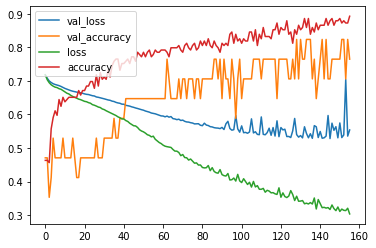

In [172]:
# visualization
model_losses.plot()

In [175]:
prediction=model.predict_classes(X_test)

In [176]:
from sklearn.metrics import classification_report,confusion_matrix

In [177]:
#ACCURACY
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.76      0.65      0.70        20

    accuracy                           0.74        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.74      0.74      0.74        42



In [178]:
#confusion matrix
print(confusion_matrix(y_test,prediction))

[[18  4]
 [ 7 13]]
